# Aggregating Data with Group by

In this session we will explore data aggregation using pandas.  Aggregation means splitting a dataset up into parts and applying mathematical or other functions to those groups of data.

By the end you will be able to create a monthly time-series showing numbers of referrals, separated by priority level.

## Theory 

You may have come across the concept of data aggregation in a SQL course, and the principle is exactly the same here.

The 'group by' operation splits the data into groups based on entries in one or more columns, so that operations or calculations can be performed on subgroups of the data.

For example, say we wanted to calculate the total number of referrals made in each CCG for some time period. Our dataset looks like this:

| ccg_code | specialty | priority | referrals |
| --- | --- | --- | --- | 
| 00L | Cardiology | Routine | 200 |
| 00L | Urology | Routine | 600 |
| 99C | Cardiology | Urgent | 100 |
| 00L | 2WW | 2 Week Wait | 400 |
| 99C | Neurology | Routine | 900 |

The data contains more information than we need, because we are not interested in the specialty or priority. In which case we want to sum referrals **for each CCG**, summing over the values in other columns. In other words, we want to *group by* CCG and calculate the sum:

| ccg_code | referrals |
| --- | --- | 
| 00L | 1,200 |
| 99C | 1,000 |

## Sections

* [Group by a single column](#item1)
* [Group by multiple columns](#item2)
* [Group by units of time](#item3)
---

In [1]:
# Importing Python packages we are likely to need
import pandas as pd  # useful for reading and manipulating data tables
import matplotlib.pyplot as plt  # useful for plotting data

### Load the data

Use `pd.read_csv` to read in the data. Then use `pd.to_datetime` to convert the `week_start` column to datetime format.

In [2]:
df = pd.read_csv("~/cf/coding_club/python_club/outputs/data/referrals_oct19_dec20.csv")
df['week_start'] = pd.to_datetime(df['week_start'])
df

,week_start,ccg_code,specialty,priority,referrals
0,2019-10-07,00L,(blank),Routine,13
1,2019-10-07,00L,(blank),Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84
...,...,...,...,...,...
592679,2020-12-21,99M,Surgery - Not Otherwise Specified,Urgent,2
592680,2020-12-21,99M,Surgery - Vascular,Routine,2
592681,2020-12-21,99M,Surgery - Vascular,Urgent,2
592682,2020-12-21,99M,Urology,Routine,25


---
<a name="item1">
<h2>Group by a single column</h2>
</a>

First, we'll take a subset of the data which will be easier to work with. Select rows where `Specialty` column has value `2WW` (two week wait cancer referrals).
* Use `==` to make a selection mask
* Use `df.loc` to select rows where the mask values are `True`

```python
smaller_df = df.loc[df['column'] == 'value', :]
```

In [3]:
df_2ww = df.loc[df['specialty'] == '2WW', :]
df_2ww

,week_start,ccg_code,specialty,priority,referrals
2,2019-10-07,00L,2WW,2 Week Wait,349
61,2019-10-07,00N,2WW,2 Week Wait,180
113,2019-10-07,00P,2WW,2 Week Wait,284
169,2019-10-07,00Q,2WW,2 Week Wait,122
226,2019-10-07,00R,2WW,2 Week Wait,170
...,...,...,...,...,...
592413,2020-12-21,99C,2WW,2 Week Wait,151
592463,2020-12-21,99E,2WW,2 Week Wait,208
592520,2020-12-21,99F,2WW,2 Week Wait,127
592574,2020-12-21,99G,2WW,2 Week Wait,113


### Sum 2WW referrals, for each CCG
* Use `df.groupby('ccg_code')`
* Select the `referrals` column
* Use the `sum` method

```python
gb = df.groupby('aggregation_column')
summed_values = gb['value_column'].sum()
```

The result of the aggregation operation (i.e. the sum) is a pandas `Series` object. The index comprises the CCG codes and the values are the summed referrals.

In [4]:
gb_ccg = df_2ww.groupby('ccg_code')
ref_per_ccg = gb_ccg['referrals'].sum()
ref_per_ccg

ccg_code
00L    18486
00N     7922
00P    14929
00Q     6695
00R     8156
       ...  
99C    11883
99E    15970
99F     9710
99G     9545
99M     9173
Name: referrals, Length: 135, dtype: int64

### Visualise referrals in each CCG with a bar chart
```python
fig, ax = plt.subplots()
ax.bar(df.index, df.values)
```

<BarContainer object of 135 artists>

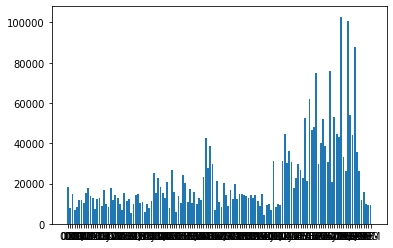

In [5]:
fig, ax = plt.subplots()
ax.bar(ref_per_ccg.index, ref_per_ccg.values)

### Take the average weekly referrals, for each CCG
Use the same `groupby` result you made previously, but this time use `mean` instead of `sum`.

```python
avg_values = gb['value_column'].mean()
```

In [6]:
mean_weekly_refs_per_ccg = gb_ccg['referrals'].mean()
mean_weekly_refs_per_ccg

ccg_code
00L    280.090909
00N    113.171429
00P    229.676923
00Q    101.439394
00R    127.437500
          ...    
99C    177.358209
99E    241.969697
99F    149.384615
99G    144.621212
99M    131.042857
Name: referrals, Length: 135, dtype: float64

### Other useful aggregate functions
* `count`
* `median`
* `std` (standard deviation)
* `sem` (standard error of the mean)
* `min` and `max`

You could also define your own aggregate functions. This flexibility is can be extremely powerful.


---
<a name="item2"><h2>
Group by multiple columns
</h2></a>

It's possible to group by multiple columns at once. This means you apply the aggregation function to each subset of values in the columns you group by. For example, if you group by `CCG` and `priority` then use the `sum` function, you will get the total number of referrals per CCG *and* per priority level.

```python
gb_multi_cols = df.groupby(['column_1', 'column_2'])
summed_values = gb_multi_cols['value_colum'].sum()
```
The result is still a pandas `Series` object, but this time the index has two 'levels', for `ccg_code` and `priority`.

Let's group by both `specialty` and `priority`, then take the sum.

In [7]:
# gb_ccg_priority = df.groupby(['specialty', 'priority'])
# ref_per_priority_per_ccg = gb_ccg_priority.sum()
# ref_per_priority_per_ccg


---
<a name="item3"><h2>Group by units of time</h1></a>

You can group by `datetime` values, just like anything else. But sometimes the units of time might be too granular to be useful, e.g. your `datetime` values may be expressed at the level of minutes or seconds, but if your data span a year then you probably don't want to show each individual data point.

Pandas has a special date `Grouper` object, which you provide to `df.groupby`. Its `key` argument lets you specify the column you want to group by and the `freq` argument specifies the desired frequency, where
* `D` means daily
* `W` means weekly
* `M` means monthly

The full list of frequency options can be found <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases">here</a>.

    gb_daily = df.groupby(pd.Grouper(key='column_name', freq='D'))

Find the total number of referrals by month and then plot the resulting time series. What happened in March 2020?

In [8]:
gb_monthly = df.groupby(pd.Grouper(key='week_start', freq='M'))
ref_monthly = gb_monthly['referrals'].sum()
ref_monthly

week_start
2019-10-31    1435744
2019-11-30    1407937
2019-12-31    1383517
2020-01-31    1448056
2020-02-29    1442748
2020-03-31    1152563
2020-04-30     267082
2020-05-31     478250
2020-06-30     959430
2020-07-31     963644
2020-08-31    1245864
2020-09-30    1128657
2020-10-31    1149103
2020-11-30    1399462
2020-12-31     756241
Freq: M, Name: referrals, dtype: int64

<AxesSubplot:xlabel='week_start'>

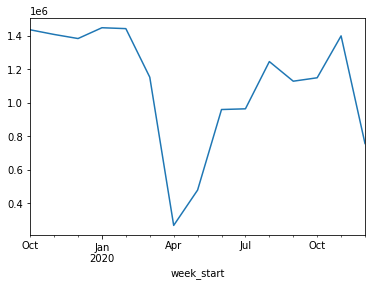

In [9]:
ref_monthly.plot()

### Unstacking

We saw above that grouping by multiple columns at once gives us a pandas `Series` object with two index 'levels'. But it is easier to handle the data if one of these levels can be switched around and expressed as multiple columns instead.

```python
gb_multi_cols = df.groupby(['column_1', 'column_2'])
summed_values_stacked = gb_multi_cols['value_colum'].sum()
summed_values_unstacked_c1 = summed_values_stacked.unstack('column_1')
```
For example, let's say our dataframe looked like this and then we used `groupby` with `sum`:

In [10]:
example_data = {
    "ccg_code": ["00L", "00L", "99C", "00L", "99C"],
    "priority": ["Routine", "Routine", "Urgent", "2 Week Wait", "Routine"],
    "referrals": ["2", "6", "1", "4", "9"]
}
example = pd.DataFrame(example_data)
example

,ccg_code,priority,referrals
0,00L,Routine,2
1,00L,Routine,6
2,99C,Urgent,1
3,00L,2 Week Wait,4
4,99C,Routine,9


In [11]:
gb_example_stacked = example.groupby(['ccg_code', 'priority']).sum()
gb_example_stacked

referrals
ccg_code priority             
00L      2 Week Wait         4
         Routine            26
99C      Routine             9
         Urgent              1

We can make the `priority` level into columns, like this:

In [12]:
gb_example_stacked.unstack('priority')

referrals               
priority 2 Week Wait Routine Urgent
ccg_code                           
00L                4      26    NaN
99C              NaN       9      1

Now let's group by month and priority and take the total number of referrals for each, then unstack the priority level, so that months are rows and priorities are columns. This will allow us to plot the time series for each priority.

In [13]:
gb_monthly_priority = df.groupby([pd.Grouper(key='week_start', freq='M'), 'priority'])
ref_monthly_priority = gb_monthly_priority['referrals'].sum()
ref_monthly_priority

ref_monthly_priority_unstack = ref_monthly_priority.unstack('priority')
ref_monthly_priority_unstack

priority,2 Week Wait,Routine,Urgent
week_start,,,
2019-10-31,217570,1050288,167886
2019-11-30,215739,1023472,168726
2019-12-31,209806,1009113,164598
2020-01-31,222783,1051599,173674
2020-02-29,216335,1056462,169951
2020-03-31,182577,834949,135037
2020-04-30,89746,128381,48955
2020-05-31,132658,261508,84084
2020-06-30,217268,586936,155226


<AxesSubplot:xlabel='week_start'>

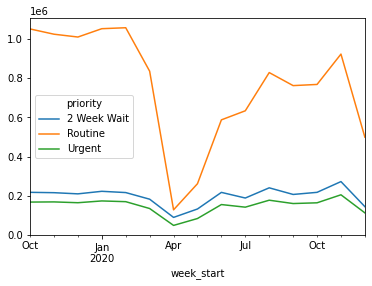

In [14]:
ref_monthly_priority_unstack.plot()

In [15]:
ref_monthly_priority_unstack.to_csv("~/cf/coding_club/python_club/outputs/data/referrals_by_priority.csv")